In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

pd.set_option("display.max_columns", 500)
pd.set_option("display.max_rows", 1000)

In [2]:
data = pd.read_csv("telecom_churn_data.csv")
print(data.shape)
data.sample(5)

(99999, 226)


mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
16824     7001852096        109             0.0             0.0   
30639     7000714987        109             0.0             0.0   
98763     7001116022        109             0.0             0.0   
12770     7002231553        109             0.0             0.0   
79232     7001525101        109             0.0             0.0   

       loc_ic_t2o_mou last_date_of_month_6 last_date_of_month_7  \
16824             0.0            6/30/2014            7/31/2014   
30639             0.0            6/30/2014            7/31/2014   
98763             0.0            6/30/2014            7/31/2014   
12770             0.0            6/30/2014            7/31/2014   
79232             0.0            6/30/2014            7/31/2014   

      last_date_of_month_8 last_date_of_month_9   arpu_6   arpu_7   arpu_8  \
16824            8/31/2014            9/30/2014  503.298  471.220    3.200   
30639            8/31/2014            9/30/2014  291.164  322.929  292.544   
98763            8/31/2014            9/30/2014  283.649  103.970  318.667   
12770            8/31/2014            9/30/2014  118.060   54.043  202.519   
79232            8/31/2014            9/30/2014  198.514  412.847  253.777   

        arpu_9  onnet_mou_6  onnet_mou_7  onnet_mou_8  onnet_mou_9  \
16824    3.300       176.78        61.88         0.00         0.00   
30639  301.835       138.74       198.91       221.54       140.11   
98763    0.700        52.88         1.21         1.46         0.00   
12770  230.525        13.59         4.99        28.81        95.64   
79232  225.329         7.34         8.44        17.21         8.38   

       offnet_mou_6  offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  \
16824       1027.66       1099.83          7.65          5.91           0.00   
30639        184.03        223.53        184.54        141.33           0.00   
98763         51.33         10.09          0.78          0.00         195.08   
12770        113.49         43.94        181.73        169.54           0.00   
79232         32.09         61.24         56.29         30.69           0.00   

       roam_ic_mou_7  roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  \
16824            0.0            0.0            0.0           0.00   
30639            0.0            0.0            0.0           0.00   
98763            0.0            0.0            0.0          41.01   
12770            0.0            0.0            0.0           0.00   
79232            0.0            0.0            0.0           0.00   

       roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  \
16824            0.0            0.0            0.0              0.11   
30639            0.0            0.0            0.0            138.74   
98763            0.0            0.0            0.0             28.34   
12770            0.0            0.0            0.0             13.59   
79232            0.0            0.0            0.0              7.34   

       loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  loc_og_t2m_mou_6  \
16824              0.16              0.00              0.00              0.66   
30639            198.91            221.54            140.11            179.71   
98763              1.21              1.46              0.00             32.38   
12770              4.99             28.81             95.64             92.01   
79232              8.44             17.21              8.38             31.69   

       loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  loc_og_t2f_mou_6  \
16824              2.96              0.00              0.00              0.00   
30639            177.43            179.43            140.74              0.00   
98763              1.89              0.78              0.00              0.00   
12770             39.06            166.48            157.64              5.11   
79232             49.66             52.39             25.68              0.00   

       l

In [3]:
data.isnull().sum()

mobile_number                   0
circle_id                       0
loc_og_t2o_mou               1018
std_og_t2o_mou               1018
loc_ic_t2o_mou               1018
last_date_of_month_6            0
last_date_of_month_7          601
last_date_of_month_8         1100
last_date_of_month_9         1659
arpu_6                          0
arpu_7                          0
arpu_8                          0
arpu_9                          0
onnet_mou_6                  3937
onnet_mou_7                  3859
onnet_mou_8                  5378
onnet_mou_9                  7745
offnet_mou_6                 3937
offnet_mou_7                 3859
offnet_mou_8                 5378
offnet_mou_9                 7745
roam_ic_mou_6                3937
roam_ic_mou_7                3859
roam_ic_mou_8                5378
roam_ic_mou_9                7745
roam_og_mou_6                3937
roam_og_mou_7                3859
roam_og_mou_8                5378
roam_og_mou_9                7745
loc_og_t2t_mou

### Initial Observations
- There are 226 columns mostly divided for 4 months 6-9
- To decide the churn rate columns related to revenue, recharge, usage are important
- As per given information we need to identify the prime customers which needs analysis of behaviour of customer
- As every feature has total column also for a particular month, it is useful for analysis

In [4]:
data.describe()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count   9.999900e+04    99999.0         98981.0         98981.0   
mean    7.001207e+09      109.0             0.0             0.0   
std     6.956694e+05        0.0             0.0             0.0   
min     7.000000e+09      109.0             0.0             0.0   
25%     7.000606e+09      109.0             0.0             0.0   
50%     7.001205e+09      109.0             0.0             0.0   
75%     7.001812e+09      109.0             0.0             0.0   
max     7.002411e+09      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8        arpu_9  \
count         98981.0  99999.000000  99999.000000  99999.000000  99999.000000   
mean              0.0    282.987358    278.536648    279.154731    261.645069   
std               0.0    328.439770    338.156291    344.474791    341.998630   
min               0.0  -2258.709000  -2014.045000   -945.808000  -1899.505000   
25%               0.0     93.411500     86.980500     84.126000     62.685000   
50%               0.0    197.704000    191.640000    192.080000    176.849000   
75%               0.0    371.060000    365.344500    369.370500    353.466500   
max               0.0  27731.088000  35145.834000  33543.624000  38805.617000   

        onnet_mou_6   onnet_mou_7   onnet_mou_8   onnet_mou_9  offnet_mou_6  \
count  96062.000000  96140.000000  94621.000000  92254.000000  96062.000000   
mean     132.395875    133.670805    133.018098    130.302327    197.935577   
std      297.207406    308.794148    308.951589    308.477668    316.851613   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        7.380000      6.660000      6.460000      5.330000     34.730000   
50%       34.310000     32.330000     32.360000     29.840000     96.310000   
75%      118.740000    115.595000    115.860000    112.130000    231.860000   
max     7376.710000   8157.780000  10752.560000  10427.460000   8362.360000   

       offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
count  96140.000000  94621.000000  92254.000000   96062.000000   96140.000000   
mean     197.045133    196.574803    190.337222       9.950013       7.149898   
std      325.862803    327.170662    319.396092      72.825411      73.447948   
min        0.000000      0.000000      0.000000       0.000000       0.000000   
25%       32.190000     31.630000     27.130000       0.000000       0.000000   
50%       91.735000     92.140000     87.290000       0.000000       0.000000   
75%      226.815000    228.260000    220.505000       0.000000       0.000000   
max     9667.130000  14007.340000  10310.760000   13724.380000   15371.040000   

       roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  \
count   94621.000000   92254.000000   96062.000000   96140.000000   
mean        7.292981       6.343841      13.911337       9.818732   
std        68.402466      57.137537      71.443196      58.455762   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max     13095.360000    8464.030000    3775.110000    2812.040000   

       roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   94621.000000   92254.000000      96062.000000      96140.000000   
mean        9.971890       8.555519         47.100763         46.473010   
std        64.713221      58.438186        150.856393        155.318705   
min         0.000000       0.000000          0.000000          0.000000   
25%         0.000000       0.000000          1.660000          1.630000   
50%         0.000000       0.000000         11.910000         11.610000   
75%         0.000000       0.000000         40.960000         39.910000   
max      

In [5]:
data.info

<bound method DataFrame.info of        mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
0         7000842753        109             0.0             0.0   
1         7001865778        109             0.0             0.0   
2         7001625959        109             0.0             0.0   
3         7001204172        109             0.0             0.0   
4         7000142493        109             0.0             0.0   
...              ...        ...             ...             ...   
99994     7001548952        109             0.0             0.0   
99995     7000607688        109             0.0             0.0   
99996     7000087541        109             0.0             0.0   
99997     7000498689        109             0.0             0.0   
99998     7001905007        109             0.0             0.0   

       loc_ic_t2o_mou last_date_of_month_6 last_date_of_month_7  \
0                 0.0            6/30/2014            7/31/2014   
1                 0.0        

In [6]:
# Extracting columns which represent some total
monthwise_total = data.columns[data.columns.str.contains('total')]
monthwise_total

Index(['total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'total_og_mou_9',
       'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8', 'total_ic_mou_9',
       'total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8',
       'total_rech_num_9', 'total_rech_amt_6', 'total_rech_amt_7',
       'total_rech_amt_8', 'total_rech_amt_9', 'total_rech_data_6',
       'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9'],
      dtype='object')

In [7]:
# Extracting columns which represent some recharge
monthwise_recharges = data.columns[data.columns.str.contains('rech_amt')]
monthwise_recharges

Index(['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
       'total_rech_amt_9', 'max_rech_amt_6', 'max_rech_amt_7',
       'max_rech_amt_8', 'max_rech_amt_9', 'av_rech_amt_data_6',
       'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9'],
      dtype='object')

## Churn or Not Churn

#### As per the given context:
- We need to create new column for labeling churn or not churn as per the 9th month usage information
- After that need to drop the 9th months data

In [8]:
mnth_9_colms = data.columns[data.columns.str.contains('_9')]
mnth_9_colms

#from these columns to detemine churn or not we only need information from incoming, outgoing and data usage.
data['churn'] = np.where(data[['vol_2g_mb_9','vol_3g_mb_9', 'total_ic_mou_9','total_og_mou_9']].sum(axis = 1) == 0,1,0)

In [9]:
print(data.churn.value_counts()/len(data))
data.head(5)

0    0.898089
1    0.101911
Name: churn, dtype: float64


mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014  197.385  214.816  213.803   21.100          NaN   
1            9/30/2014   34.047  355.074  268.321   86.285        24.11   
2            9/30/2014  167.690  189.058  210.226  290.714        11.54   
3            9/30/2014  221.338  251.102  508.054  389.500        99.91   
4            9/30/2014  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              

In [10]:
# Dropping information related to column 9 as it will not be available
data = data.drop(columns=mnth_9_colms, axis = 1)
print(data.shape)

(99999, 173)


## Identifying Prime Customers


- To identify the high value customers we need to check the total usage 
- They are described as those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).
- We have 2 kinds of recharge 1) cellular 2) Data
- We will find the total recharge amount for month 6 & 7 and create a new dataframe for prime customers only

In [11]:
# Extracting columns which represent some recharge
monthwise_recharges = data.columns[data.columns.str.contains('rech_amt')]
monthwise_recharges

monthwise_data_recharges_cols = data.columns[data.columns.str.contains('_data_')]
monthwise_data_recharges_cols
# from above column list we have total recharged data but not the cost; we can get it by multiplying the avg data rech amnt

Index(['date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'total_rech_data_6', 'total_rech_data_7',
       'total_rech_data_8', 'max_rech_data_6', 'max_rech_data_7',
       'max_rech_data_8', 'av_rech_amt_data_6', 'av_rech_amt_data_7',
       'av_rech_amt_data_8'],
      dtype='object')

In [12]:
# Columns which are required for further calculation
columns_to_consider_cell = ['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8']
columns_to_consider_data = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8',
                      'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8']

In [13]:
# Calculate the total data recharge amount 
data['total_data_rech_amt_6'] = data['total_rech_data_6'] * data['av_rech_amt_data_6'] 
data['total_data_rech_amt_7'] = data['total_rech_data_7'] * data['av_rech_amt_data_7']
data['total_data_rech_amt_8'] = data['total_rech_data_8'] * data['av_rech_amt_data_8']
data.shape

(99999, 176)

In [14]:
# now we don't need other 2 columns as we have calculated the total data recharge amount hence dropping them 
data = data.drop(columns=columns_to_consider_data, axis = 1)
data.shape

(99999, 170)

In [15]:
# To calculate total recharge amount we need following columns
total_rech_6_and_7_cols = ['total_data_rech_amt_6', 'total_data_rech_amt_7', 'total_rech_amt_6', 'total_rech_amt_7']

# Check if null values are there
print(data[total_rech_6_and_7_cols].isnull().sum())

# We will replace null with 0 for now
data[total_rech_6_and_7_cols] = data[total_rech_6_and_7_cols].fillna(0)

# Check if null values are there
print(data[total_rech_6_and_7_cols].isnull().sum())

total_data_rech_amt_6    74846
total_data_rech_amt_7    74428
total_rech_amt_6             0
total_rech_amt_7             0
dtype: int64
total_data_rech_amt_6    0
total_data_rech_amt_7    0
total_rech_amt_6         0
total_rech_amt_7         0
dtype: int64


In [16]:
# Now we will derive new column as total_avg_rech_amt_6_and_7 to store total avg recharge amount for month 6 and 7
total_avg_rech_amt_6_and_7 = (data['total_data_rech_amt_6'] + data['total_data_rech_amt_7'] \
                                 + data['total_rech_amt_6'] + data['total_rech_amt_7'])/2
print("Total Avg amount of recharge for 6 and 7 mnth is: ", sum(total_avg_rech_amt_6_and_7) , "\n\n")
data.head(5)

Total Avg amount of recharge for 6 and 7 mnth is:  48532321.43 




mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8   arpu_6  \
0            6/30/2014            7/31/2014            8/31/2014  197.385   
1            6/30/2014            7/31/2014            8/31/2014   34.047   
2            6/30/2014            7/31/2014            8/31/2014  167.690   
3            6/30/2014            7/31/2014            8/31/2014  221.338   
4            6/30/2014            7/31/2014            8/31/2014  261.636   

    arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
0  214.816  213.803          NaN          NaN         0.00           NaN   
1  355.074  268.321        24.11        78.68         7.68         15.74   
2  189.058  210.226        11.54        55.24        37.26        143.33   
3  251.102  508.054        99.91        54.39       310.98        123.31   
4  309.876  238.174        50.31       149.44        83.89         76.96   

   offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0           NaN          0.00            NaN            NaN           0.00   
1         99.84        304.76            0.0           0.00           0.00   
2        220.59        208.36            0.0           0.00           0.00   
3        109.01         71.68            0.0          54.86          44.38   
4         91.88        124.26            0.0           0.00           0.00   

   roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
0            NaN            NaN           0.00               NaN   
1            0.0           0.00           0.00             23.88   
2            0.0           0.00           0.00              7.19   
3            0.0          28.09          39.04             73.68   
4            0.0           0.00           0.00             50.31   

   loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
0               NaN              0.00               NaN               NaN   
1             74.56              7.68             11.51             75.94   
2             28.74             13.58             29.34             16.86   
3             34.81             10.61            107.43             83.21   
4            149.44             83.89             67.64             91.88   

   loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
0              0.00               NaN               NaN              0.00   
1            291.86              0.00              0.00              0.00   
2             38.46             24.11             21.79             15.61   
3             22.46              1.91              0.65              4.91   
4            124.26              0.00              0.00              0.00   

   loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
0               NaN               NaN              0.00           NaN   
1               0.0              2.91              0.00         35.39   
2               0.0            135.54             45.76         60.66   
3               0.0              0.00              0.00        183.03   
4               0.0              0.00              0.00        117.96   

   loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
0           NaN          0.00               NaN               NaN   
1        150.51        299.54              0.23              4.11   
2         67.41         67.66              4.34             26.49   
3        118.68         37.99             26.23             14.89   
4        241.33     

In [17]:
# We need highvalue customers which have 70% or more avg recharge amount (6 & 7 month)
prime_cust_threshold = np.percentile(total_avg_rech_amt_6_and_7, 70.0)
print("The prime customer threshold recharge amount is: ", prime_cust_threshold)

The prime customer threshold recharge amount is:  478.0


In [18]:
# Now we will create new dataframe which will have only prime customer with percentile recharge >=70
prime = data[total_avg_rech_amt_6_and_7 >= prime_cust_threshold]
prime.shape

(30001, 170)

In [19]:
# Checking the data balance
print(prime.churn.value_counts()/len(prime))
prime.head(5)

0    0.918636
1    0.081364
Name: churn, dtype: float64


mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0      7000842753        109             0.0             0.0             0.0   
7      7000701601        109             0.0             0.0             0.0   
8      7001524846        109             0.0             0.0             0.0   
21     7002124215        109             0.0             0.0             0.0   
23     7000887461        109             0.0             0.0             0.0   

   last_date_of_month_6 last_date_of_month_7 last_date_of_month_8    arpu_6  \
0             6/30/2014            7/31/2014            8/31/2014   197.385   
7             6/30/2014            7/31/2014            8/31/2014  1069.180   
8             6/30/2014            7/31/2014            8/31/2014   378.721   
21            6/30/2014            7/31/2014            8/31/2014   514.453   
23            6/30/2014            7/31/2014            8/31/2014    74.350   

      arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
0    214.816   213.803          NaN          NaN         0.00           NaN   
7   1349.850  3171.480        57.84        54.68        52.29        453.43   
8    492.223   137.362       413.69       351.03        35.08         94.66   
21   597.753   637.760       102.41       132.11        85.14        757.93   
23   193.897   366.966        48.96        50.66        33.58         85.41   

    offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0            NaN          0.00            NaN            NaN           0.00   
7         567.16        325.91          16.23          33.49          31.64   
8          80.63        136.48           0.00           0.00           0.00   
21        896.68        983.39           0.00           0.00           0.00   
23         89.36        205.89           0.00           0.00           0.00   

    roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
0             NaN            NaN           0.00               NaN   
7           23.74          12.59          38.06             51.39   
8            0.00           0.00           0.00            297.13   
21           0.00           0.00           0.00              4.48   
23           0.00           0.00           0.00             48.96   

    loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
0                NaN              0.00               NaN               NaN   
7              31.38             40.28            308.63            447.38   
8             217.59             12.49             80.96             70.58   
21              6.16             23.34             91.81             87.93   
23             50.66             33.58             82.94             83.01   

    loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
0               0.00               NaN               NaN              0.00   
7             162.28             62.13             55.14             53.23   
8              50.54              0.00              0.00              0.00   
21            104.81              0.75              0.00              1.58   
23            148.56              0.00              0.00              0.00   

    loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
0                NaN               NaN              0.00           NaN   
7                0.0               0.0              0.00        422.16   
8                0.0               0.0              7.15        378.09   
21               0.0               0.0              0.00         97.04   
23               0.0               0.0             17.71        131.91   

    loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
0            NaN          0.00               NaN               NaN   
7         533.91        255.79              4.30             23.29   
8         288.18         63.04            116.56            133.43   
21         94.09    

## Data Cleaning

In [20]:
prime.isnull().sum()/len(prime)

mobile_number               0.000000
circle_id                   0.000000
loc_og_t2o_mou              0.007466
std_og_t2o_mou              0.007466
loc_ic_t2o_mou              0.007466
last_date_of_month_6        0.000000
last_date_of_month_7        0.000900
last_date_of_month_8        0.005500
arpu_6                      0.000000
arpu_7                      0.000000
arpu_8                      0.000000
onnet_mou_6                 0.018166
onnet_mou_7                 0.017899
onnet_mou_8                 0.039132
offnet_mou_6                0.018166
offnet_mou_7                0.017899
offnet_mou_8                0.039132
roam_ic_mou_6               0.018166
roam_ic_mou_7               0.017899
roam_ic_mou_8               0.039132
roam_og_mou_6               0.018166
roam_og_mou_7               0.017899
roam_og_mou_8               0.039132
loc_og_t2t_mou_6            0.018166
loc_og_t2t_mou_7            0.017899
loc_og_t2t_mou_8            0.039132
loc_og_t2m_mou_6            0.018166
l

In [21]:
# We will drop the columns where null values are more than 40%
# There are features such that night ack user, fb user, arpu_3g, arpu_2g which we can't decide and more than 40% values are missing in it

columns_with_missing_values = []

for i in prime.columns:
    if (prime[i].isnull().sum()/len(prime)) > 0.4:
        columns_with_missing_values.append(i)
        
print(columns_with_missing_values)

prime_backup_1 = prime
# Dropping the coluns with more than 40% null
prime = prime.drop(columns=columns_with_missing_values, axis=1)
prime.shape

['date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8', 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'total_data_rech_amt_8']


(30001, 145)

In [22]:
# We will further check the variation given by each column
#If all the values in a column are same; then the column is not usefull

#prime.circle_id.nunique()

columns_with_one_unique_value = []

for i in prime.columns:
    if prime[i].nunique() == 1:
        columns_with_one_unique_value.append(i)

print(columns_with_one_unique_value)

# We will drop such columns as well as they will not provide any information and won't help in prediction
prime_backup_2 = prime

prime = prime.drop(columns=columns_with_one_unique_value, axis =1)
prime.shape

['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8']


(30001, 132)

In [23]:
prime.isnull().sum()

mobile_number               0
arpu_6                      0
arpu_7                      0
arpu_8                      0
onnet_mou_6               545
onnet_mou_7               537
onnet_mou_8              1174
offnet_mou_6              545
offnet_mou_7              537
offnet_mou_8             1174
roam_ic_mou_6             545
roam_ic_mou_7             537
roam_ic_mou_8            1174
roam_og_mou_6             545
roam_og_mou_7             537
roam_og_mou_8            1174
loc_og_t2t_mou_6          545
loc_og_t2t_mou_7          537
loc_og_t2t_mou_8         1174
loc_og_t2m_mou_6          545
loc_og_t2m_mou_7          537
loc_og_t2m_mou_8         1174
loc_og_t2f_mou_6          545
loc_og_t2f_mou_7          537
loc_og_t2f_mou_8         1174
loc_og_t2c_mou_6          545
loc_og_t2c_mou_7          537
loc_og_t2c_mou_8         1174
loc_og_mou_6              545
loc_og_mou_7              537
loc_og_mou_8             1174
std_og_t2t_mou_6          545
std_og_t2t_mou_7          537
std_og_t2t

In [24]:
# Converting dates to datetime format
prime.select_dtypes(include=['object'])

prime['date_of_last_rech_6'] = pd.to_datetime(prime['date_of_last_rech_6'])
prime['date_of_last_rech_7'] = pd.to_datetime(prime['date_of_last_rech_7'])
prime['date_of_last_rech_8'] = pd.to_datetime(prime['date_of_last_rech_8'])

In [25]:
# We still have few null vlaues which we will drop (dropping the rows with null values present)
for i in prime.columns:
    if prime[i].isnull().sum()>0:
        prime = prime[~np.isnan(prime[i])]

prime.shape

(28163, 132)

In [26]:
# Checking Null values in the data
prime.isnull().sum()

mobile_number            0
arpu_6                   0
arpu_7                   0
arpu_8                   0
onnet_mou_6              0
onnet_mou_7              0
onnet_mou_8              0
offnet_mou_6             0
offnet_mou_7             0
offnet_mou_8             0
roam_ic_mou_6            0
roam_ic_mou_7            0
roam_ic_mou_8            0
roam_og_mou_6            0
roam_og_mou_7            0
roam_og_mou_8            0
loc_og_t2t_mou_6         0
loc_og_t2t_mou_7         0
loc_og_t2t_mou_8         0
loc_og_t2m_mou_6         0
loc_og_t2m_mou_7         0
loc_og_t2m_mou_8         0
loc_og_t2f_mou_6         0
loc_og_t2f_mou_7         0
loc_og_t2f_mou_8         0
loc_og_t2c_mou_6         0
loc_og_t2c_mou_7         0
loc_og_t2c_mou_8         0
loc_og_mou_6             0
loc_og_mou_7             0
loc_og_mou_8             0
std_og_t2t_mou_6         0
std_og_t2t_mou_7         0
std_og_t2t_mou_8         0
std_og_t2m_mou_6         0
std_og_t2m_mou_7         0
std_og_t2m_mou_8         0
s

- all the null values has been handled
- Now in the next step we will focus on dimentionality reduction
- we will use PCA and also correlation matrice to check the corrleation and drop the colums accordingly

In [27]:
# prime_number_cols = prime.select_dtypes(include=['number'])
# img = plt.figure(figsize=(20,20))
# sns.heatmap(prime_number_cols.corr(), cmap="YlGnBu")
# img.show()

##### Many features have high correlation; we will handle the high correlation below

- Using manual efforts
- Using PCA

### Helper Functions

In [28]:
def display_boxplot(variable, data):
    fig_dims = (18,2)
    fig, ax = plt.subplots(figsize = fig_dims)
    sns.boxplot(x= variable, data=data, ax=ax)

def display_countplot(variable, data):
    fig_dims = (10, 7)
    fig, ax = plt.subplots(figsize = fig_dims)
    sns.countplot(x=data.churn, data=data, hue=variable)
    
def display_barplot(variable, data):
    g = sns.countplot(x=data[variable], data=data)
    total = len(data)
    sizes = []
    
    for p in g.patches:
        height = p.get_height()
        sizes.append(height)
        g.text(p.get_x()+p.get_width()/2.0,
               height-15,
               '{:1.2f}%'.format(height/total*100),
                ha="center", fontsize=8)

In [29]:
# Finding correlation between all the variables wrt Churn
correlation_df = pd.DataFrame(prime.corr()['churn']).reset_index()
correlation_df.set_index(['index'], inplace = True)

#Selection Features with the more positive or negative correlations with SalePrice
correlation_df = correlation_df.loc[(correlation_df.churn > 0.05) | (correlation_df.churn < -0.05)]
features = list(correlation_df.index)
print(features)

print("Total correlated features: ",len(features))

['arpu_6', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'offnet_mou_6', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_mou_6', 'std_og_mou_7', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8', 'loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8', 'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8', 'total_rech_num_6', 'total_rech_num_8', 'total_rech_amt_6', 'total_rech_amt_8', 'max_rech_amt_8', 'last_day_rch_amt_8', 'vol_2g_mb_8', 'vol_3g_mb_8', 'monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 'sachet_2g_8', 'monthly_3g_8', 'aon', 'aug_vbc_3g', 'churn']
Total correlated features:  56


In [30]:
filtered_prime = prime[features]
print(filtered_prime.shape)
filtered_prime.head()

(28163, 56)


arpu_6    arpu_8  onnet_mou_6  onnet_mou_7  offnet_mou_6  offnet_mou_8  \
7   1069.180  3171.480        57.84        54.68        453.43        325.91   
8    378.721   137.362       413.69       351.03         94.66        136.48   
21   514.453   637.760       102.41       132.11        757.93        983.39   
23    74.350   366.966        48.96        50.66         85.41        205.89   
33   977.020   409.230         0.00         0.00          0.00          0.00   

    roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  \
7           16.23          33.49          31.64          23.74          12.59   
8            0.00           0.00           0.00           0.00           0.00   
21           0.00           0.00           0.00           0.00           0.00   
23           0.00           0.00           0.00           0.00           0.00   
33           0.00           0.00           0.00           0.00           0.00   

    roam_og_mou_8  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
7           38.06             40.28            308.63            447.38   
8            0.00             12.49             80.96             70.58   
21           0.00             23.34             91.81             87.93   
23           0.00             33.58             82.94             83.01   
33           0.00              0.00              0.00              0.00   

    loc_og_t2m_mou_8  loc_og_t2f_mou_8  loc_og_mou_6  loc_og_mou_7  \
7             162.28             53.23        422.16        533.91   
8              50.54              0.00        378.09        288.18   
21            104.81              1.58         97.04         94.09   
23            148.56              0.00        131.91        133.68   
33              0.00              0.00          0.00          0.00   

    loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2m_mou_6  \
7         255.79              4.30             23.29             49.89   
8          63.04            116.56            133.43             13.69   
21        129.74             97.93            125.94            665.36   
23        182.14              0.00              0.00              2.36   
33          0.00              0.00              0.00              0.00   

    std_og_t2m_mou_7  std_og_mou_6  std_og_mou_7  total_og_mou_6  \
7              31.76         60.86         75.14          487.53   
8              10.04        130.26        143.48          508.36   
21            808.74        763.29        934.69          860.34   
23              6.35          2.36          6.35          134.38   
33              0.00          0.00          0.00            0.00   

    total_og_mou_7  total_og_mou_8  loc_ic_t2t_mou_8  loc_ic_t2m_mou_6  \
7           609.24          350.16             27.31            217.56   
8           431.66          171.56              0.31             57.58   
21         1028.79         1068.54             19.54            118.23   
23          140.04          239.48             76.64             95.91   
33            0.00            0.56              2.45              0.00   

    loc_ic_t2m_mou_7  loc_ic_t2m_mou_8  loc_ic_t2f_mou_8  loc_ic_mou_6  \
7             221.49            121.19             39.53        427.88   
8              13.98             15.48              0.00         81.43   
21             74.63            129.16             10.39        125.33   
23            113.36            146.84              0.71        116.63   
33              0.00             37.93              0.16          3.48   

    loc_ic_mou_7  loc_ic_mou_8  total_ic_mou_6  total_ic_mou_7  \
7         355.23        188.04          626.46          558.04   
8          23.83         15.79          103.86           28.49   
21         87.68        159.11          207.09          131.89   
23        174.41        224.21          119.58          222.89   
33          0.88         40.54            7.89            7.19   

    total_ic_mou_8  total

In [31]:
# plotting boxplots to check features with outliers
# for i in filtered_prime.columns:
#     display_boxplot(i,filtered_prime)

In [32]:
#Plotting separate graphs for all nuerical variables to check distribution
def plot_box_dist(i,j, total, data):

    a=total
    b=2
    c=1
    num_cols = data.columns[i:j]

    fig = plt.figure(figsize=(40,100))
    fig.set_size_inches(30,250)

    for i in num_cols:
        plt.subplot(a,b,c)
        plt.title('{}, subplot: {}{}{}'.format(i,a,b,c),fontsize=25)
        plt.xlabel(i,fontsize=25)
        plt.ylabel(i,fontsize=25)
        plt.xticks(fontsize=25,rotation=90)
        plt.tick_params(axis='both', which='major', labelsize=25)
        sns.boxplot(data[i], color='r')
        c=c+1
        plt.subplot(a,b,c)
        plt.title('{}, subplot: {}{}{}'.format(i,a,b,c),fontsize=25)
        plt.xlabel(i,fontsize=25)
        plt.ylabel(i,fontsize=25)
        plt.xticks(fontsize=25,rotation=90)
        plt.tick_params(axis='both', which='major', labelsize=25)
        sns.distplot(data[i],color = 'r') #check the estimator 'mean' here by default
        c = c+1
    fig.tight_layout()
    plt.show();

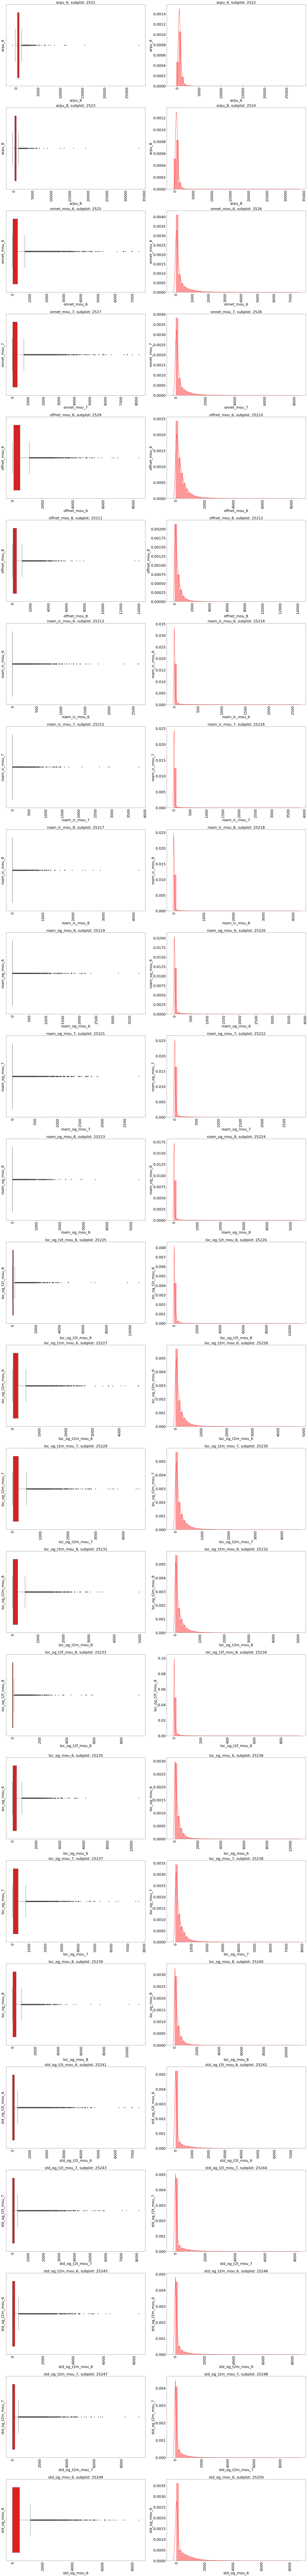

In [33]:
# Batch 1
plot_box_dist(0,25,25,filtered_prime)

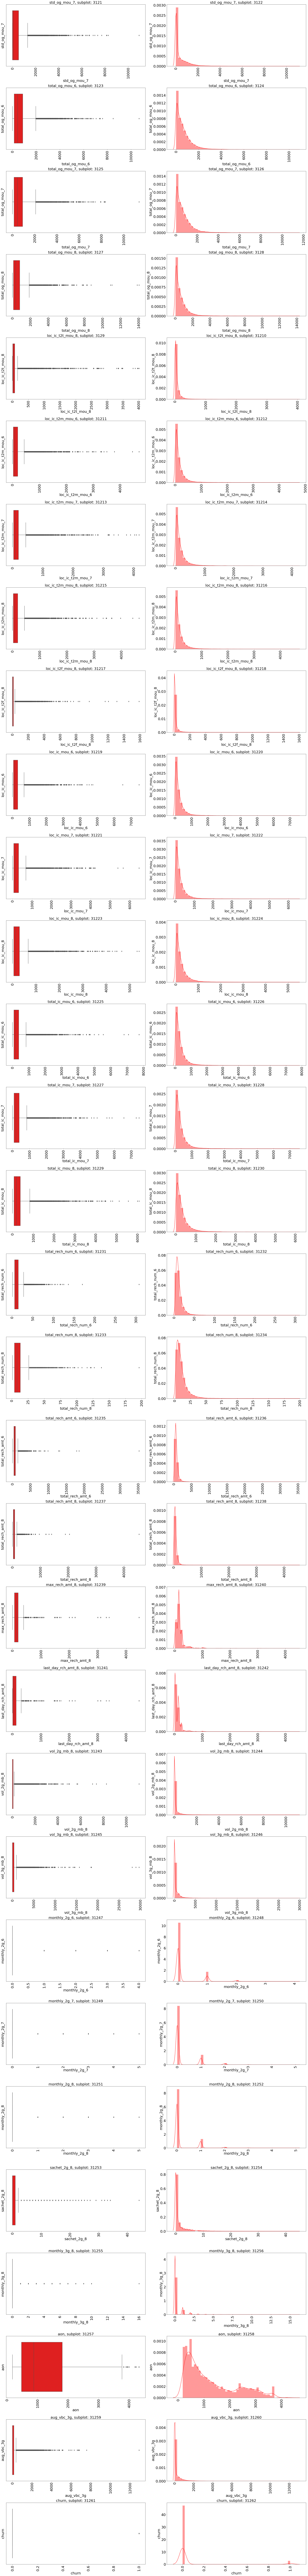

In [34]:
# Batch 2
plot_box_dist(25,56,31,filtered_prime)

#### from above plots we can observe that few features has outliers and we need to handle outliers


1. monthly_2g_6
2. monthly_2g_7
3. monthly_2g_8
4. churn

These columns to not require the outlier treatment

In [35]:
prime_backup_3 = filtered_prime
#listing out columns which require the outlier treatment
otlr_treat_columns = list(set(filtered_prime.columns) - set(['monthly_2g_6','monthly_2g_7','monthly_2g_8','monthly_3g_8','churn']))
print(otlr_treat_columns)
filtered_prime[otlr_treat_columns].shape
out_df = filtered_prime[otlr_treat_columns]
out_df.shape

['total_rech_amt_8', 'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_8', 'loc_og_t2m_mou_8', 'aug_vbc_3g', 'total_rech_amt_6', 'std_og_t2m_mou_7', 'total_og_mou_6', 'roam_ic_mou_7', 'loc_og_t2m_mou_6', 'offnet_mou_6', 'onnet_mou_7', 'loc_og_t2f_mou_8', 'std_og_mou_7', 'loc_ic_mou_8', 'loc_og_mou_8', 'std_og_t2t_mou_7', 'onnet_mou_6', 'loc_ic_mou_7', 'sachet_2g_8', 'total_ic_mou_7', 'loc_ic_mou_6', 'std_og_mou_6', 'std_og_t2t_mou_6', 'std_og_t2m_mou_6', 'roam_ic_mou_6', 'total_rech_num_8', 'roam_ic_mou_8', 'loc_og_mou_6', 'roam_og_mou_8', 'loc_og_mou_7', 'total_ic_mou_6', 'last_day_rch_amt_8', 'loc_og_t2m_mou_7', 'max_rech_amt_8', 'offnet_mou_8', 'total_og_mou_8', 'total_ic_mou_8', 'total_rech_num_6', 'loc_ic_t2t_mou_8', 'roam_og_mou_6', 'vol_2g_mb_8', 'loc_ic_t2m_mou_7', 'roam_og_mou_7', 'arpu_8', 'arpu_6', 'loc_og_t2t_mou_8', 'total_og_mou_7', 'loc_ic_t2f_mou_8', 'vol_3g_mb_8', 'aon']


(28163, 51)

### Outlier Treatment

In [36]:
# Function for outlier detection and removal
'''
Even though the upper and lower bond formulae are as given below

fence_low  = q1-1.5*iqr
fence_high = q3+1.5*iqr

we will still remove otliers avobe 99% and below 1% data
'''

def remove_outlier(df_in, col_name):
    fence_low = df_in[col_name].quantile(0.01)
    fence_high = df_in[col_name].quantile(0.99)
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [37]:
#Outlier Removal
# We will remove otliers from some selected columns only as it is reducing the available rows drastically (tried)

(27592, 56)


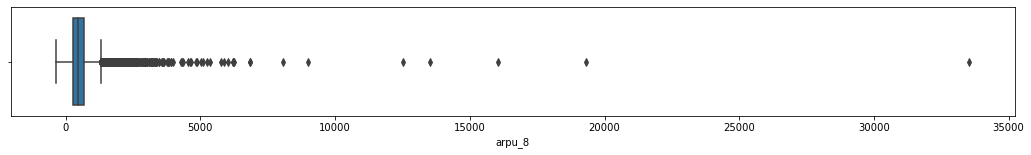

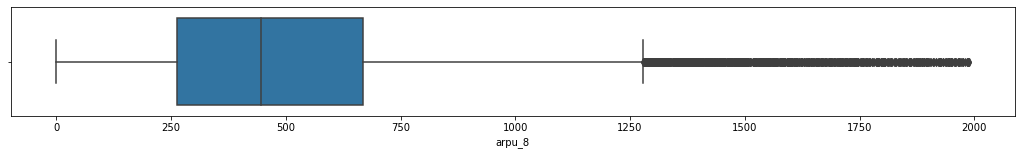

In [38]:
# Before
display_boxplot('arpu_8',filtered_prime)
plt.show

#After outlier treatment
filtered_prime = remove_outlier(filtered_prime,'arpu_8')
display_boxplot('arpu_8',filtered_prime)
plt.show

print(filtered_prime.shape)

(26266, 56)


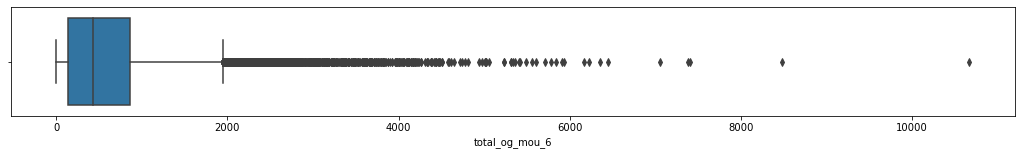

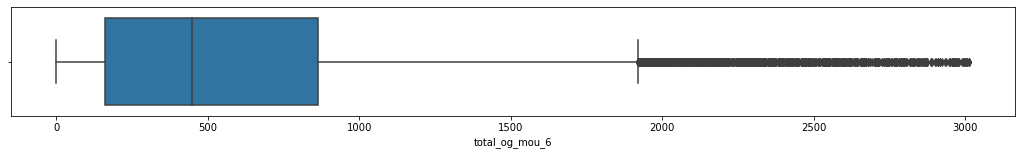

In [39]:
# Before
display_boxplot('total_og_mou_6',filtered_prime)
plt.show

#After outlier treatment
filtered_prime = remove_outlier(filtered_prime,'total_og_mou_6')
display_boxplot('total_og_mou_6',filtered_prime)
plt.show

print(filtered_prime.shape)

(25456, 56)
(24444, 56)


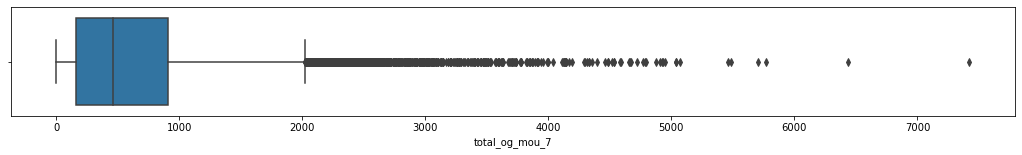

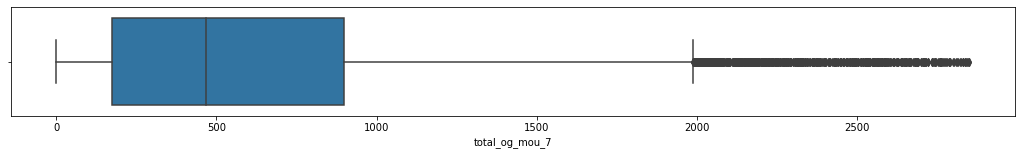

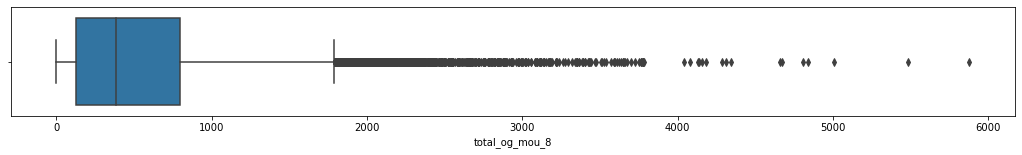

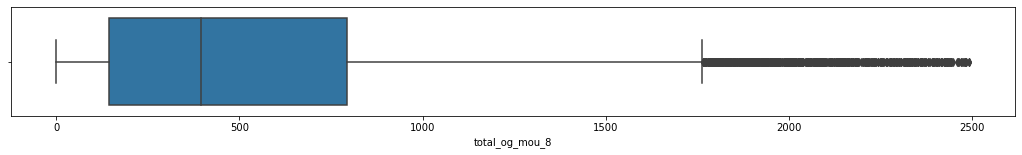

In [40]:
# Before
display_boxplot('total_og_mou_7',filtered_prime)
plt.show

#After outlier treatment
filtered_prime = remove_outlier(filtered_prime,'total_og_mou_7')
display_boxplot('total_og_mou_7',filtered_prime)
plt.show

print(filtered_prime.shape)

# Before
display_boxplot('total_og_mou_8',filtered_prime)
plt.show

#After outlier treatment
filtered_prime = remove_outlier(filtered_prime,'total_og_mou_8')
display_boxplot('total_og_mou_8',filtered_prime)
plt.show

print(filtered_prime.shape)

(23954, 56)
(23474, 56)
(23003, 56)


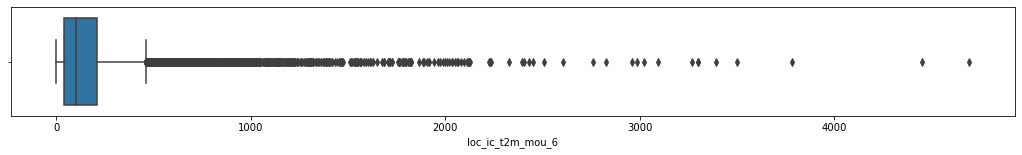

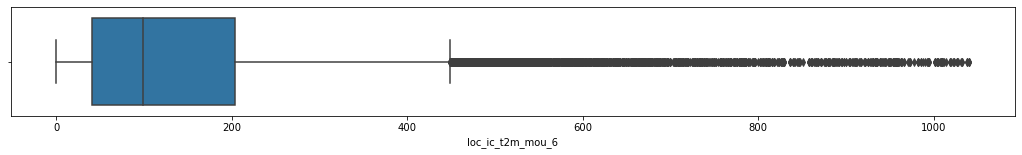

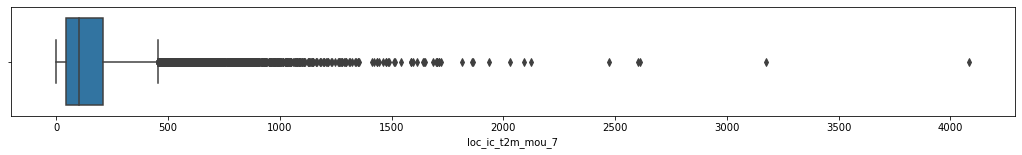

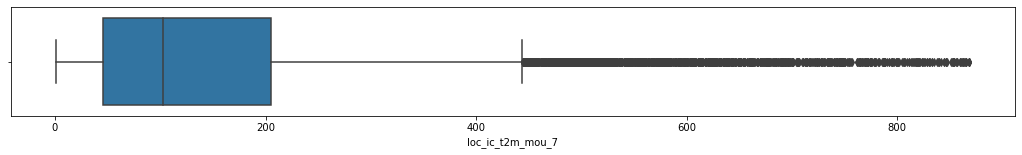

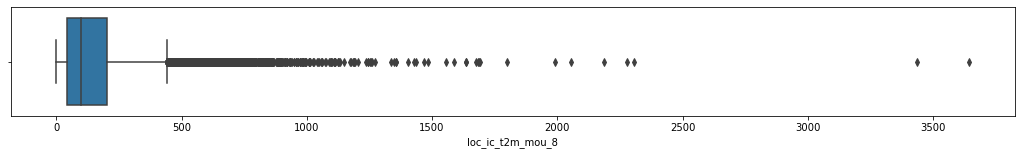

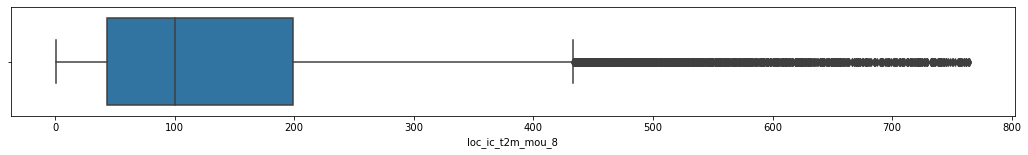

In [41]:
# Before
display_boxplot('loc_ic_t2m_mou_6',filtered_prime)
plt.show

#After outlier treatment
filtered_prime = remove_outlier(filtered_prime,'loc_ic_t2m_mou_6')
display_boxplot('loc_ic_t2m_mou_6',filtered_prime)
plt.show

print(filtered_prime.shape)

# Before
display_boxplot('loc_ic_t2m_mou_7',filtered_prime)
plt.show

#After outlier treatment
filtered_prime = remove_outlier(filtered_prime,'loc_ic_t2m_mou_7')
display_boxplot('loc_ic_t2m_mou_7',filtered_prime)
plt.show

print(filtered_prime.shape)

# Before
display_boxplot('loc_ic_t2m_mou_8',filtered_prime)
plt.show

#After outlier treatment
filtered_prime = remove_outlier(filtered_prime,'loc_ic_t2m_mou_8')
display_boxplot('loc_ic_t2m_mou_8',filtered_prime)
plt.show

print(filtered_prime.shape)


(22541, 56)
(22089, 56)
(21647, 56)


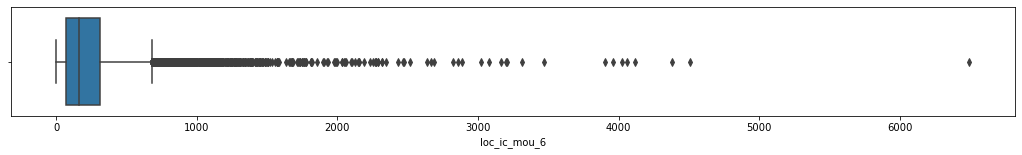

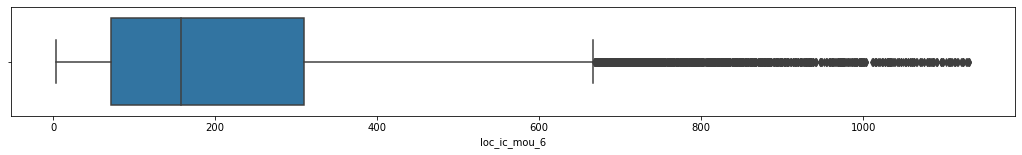

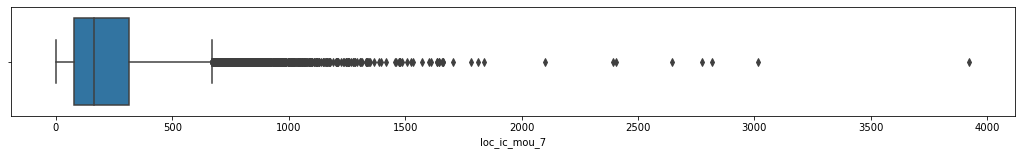

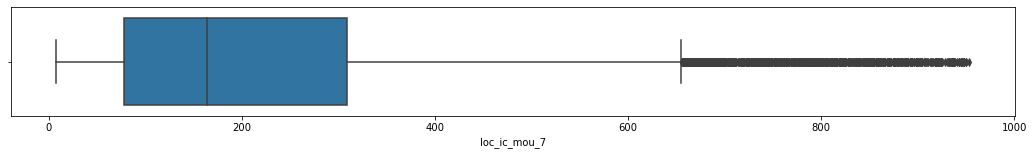

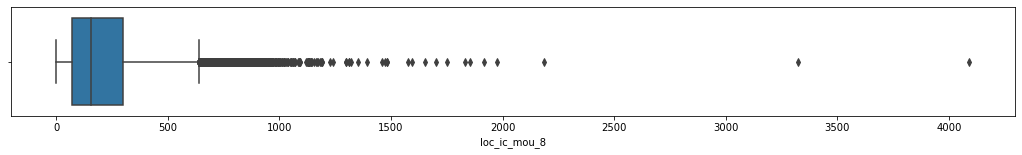

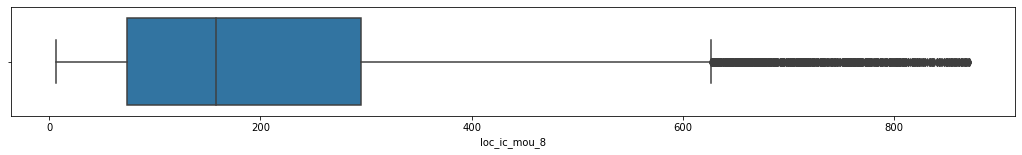

In [42]:
# Before
display_boxplot('loc_ic_mou_6',filtered_prime)
plt.show

#After outlier treatment
filtered_prime = remove_outlier(filtered_prime,'loc_ic_mou_6')
display_boxplot('loc_ic_mou_6',filtered_prime)
plt.show

print(filtered_prime.shape)

# Before
display_boxplot('loc_ic_mou_7',filtered_prime)
plt.show

#After outlier treatment
filtered_prime = remove_outlier(filtered_prime,'loc_ic_mou_7')
display_boxplot('loc_ic_mou_7',filtered_prime)
plt.show

print(filtered_prime.shape)

# Before
display_boxplot('loc_ic_mou_8',filtered_prime)
plt.show

#After outlier treatment
filtered_prime = remove_outlier(filtered_prime,'loc_ic_mou_8')
display_boxplot('loc_ic_mou_8',filtered_prime)
plt.show

print(filtered_prime.shape)


In [43]:
# conevrt AON in months
filtered_prime['aon_mon'] = filtered_prime['aon']/30
filtered_prime.drop('aon', axis=1, inplace=True)
filtered_prime['aon_mon'].head()

8     10.500000
21    24.000000
23    20.133333
38    38.500000
41    67.000000
Name: aon_mon, dtype: float64

In [44]:
high_val_cust = filtered_prime.copy()
high_val_cust.head()

arpu_6   arpu_8  onnet_mou_6  onnet_mou_7  offnet_mou_6  offnet_mou_8  \
8   378.721  137.362       413.69       351.03         94.66        136.48   
21  514.453  637.760       102.41       132.11        757.93        983.39   
23   74.350  366.966        48.96        50.66         85.41        205.89   
38  363.987  393.909       248.99       619.96         88.86         97.81   
41  482.832  229.769        86.39       118.88        232.36        136.69   

    roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  \
8             0.0            0.0            0.0            0.0            0.0   
21            0.0            0.0            0.0            0.0            0.0   
23            0.0            0.0            0.0            0.0            0.0   
38            0.0            0.0            0.0            0.0            0.0   
41            0.0            0.0            0.0            0.0            0.0   

    roam_og_mou_8  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
8             0.0             12.49             80.96             70.58   
21            0.0             23.34             91.81             87.93   
23            0.0             33.58             82.94             83.01   
38            0.0              9.48             33.76             16.19   
41            0.0             80.44            142.69            174.91   

    loc_og_t2m_mou_8  loc_og_t2f_mou_8  loc_og_mou_6  loc_og_mou_7  \
8              50.54              0.00        378.09        288.18   
21            104.81              1.58         97.04         94.09   
23            148.56              0.00        131.91        133.68   
38             18.96              0.00         63.64         33.53   
41            107.88             14.88        283.24        304.46   

    loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2m_mou_6  \
8          63.04            116.56            133.43             13.69   
21        129.74             97.93            125.94            665.36   
23        182.14              0.00              0.00              2.36   
38         28.44            219.11            602.63             55.09   
41        203.21              0.00              0.00              0.00   

    std_og_t2m_mou_7  std_og_mou_6  std_og_mou_7  total_og_mou_6  \
8              10.04        130.26        143.48          508.36   
21            808.74        763.29        934.69          860.34   
23              6.35          2.36          6.35          134.38   
38             34.38        274.21        637.01          337.86   
41              0.00         34.68         94.89          318.76   

    total_og_mou_7  total_og_mou_8  loc_ic_t2t_mou_8  loc_ic_t2m_mou_6  \
8           431.66          171.56              0.31             57.58   
21         1028.79         1068.54             19.54            118.23   
23          140.04          239.48             76.64             95.91   
38          670.54          764.19              1.36             37.99   
41          400.51          217.14             49.89             12.18   

    loc_ic_t2m_mou_7  loc_ic_t2m_mou_8  loc_ic_t2f_mou_8  loc_ic_mou_6  \
8              13.98             15.48              0.00         81.43   
21             74.63            129.16             10.39        125.33   
23            113.36            146.84              0.71        116.63   
38             16.73             28.06              0.00         46.68   
41             91.94             10.74              0.00         83.43   

    loc_ic_mou_7  loc_ic_mou_8  total_ic_mou_6  total_ic_mou_7  \
8          23.83         15.79          103.86           28.49   
21         87.68        159.11          207.09          131.89   
23        174.41        224.21          119.58          222.89   
38         28.53         29.43           70.79           67.94   
41        252.99         60.64          278.31          475.39   

    total_ic_mou_8  total_rech_num_6

## Building First Model
### Logistic Regression

In [45]:
# Data holding
from sklearn.model_selection import train_test_split

y = filtered_prime['churn']
X = filtered_prime.drop(['churn'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 1)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(15152, 55)
(15152,)
(6495, 55)
(6495,)


### Handling data imbalance

In [46]:
# As the data is imbalance we will perform oversampling on training data

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 42)
X_train_oversampled, y_train_oversampled = sm.fit_sample(X_train, y_train)
X_train = pd.DataFrame(X_train_oversampled, columns=X_train.columns)
y_train = y_train_oversampled
print(X_train.shape)
print(y_train.shape)

(29296, 55)
(29296,)


In [47]:
# Checking data balance after over sampling
print(pd.DataFrame(y_train).value_counts())

churn
1        14648
0        14648
dtype: int64


### Scaling

In [48]:
# Standardization and Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train.head()


arpu_6    arpu_8  onnet_mou_6  onnet_mou_7  offnet_mou_6  offnet_mou_8  \
0   607.217   344.678        65.56        90.54        199.34        171.21   
1  1419.971   586.043       128.13       171.99       1030.54        426.29   
2   658.900   847.385       889.53      1012.54        383.93        418.31   
3   503.342   469.648       236.09        73.41        308.29        140.64   
4   808.763  1383.984       688.69       457.91        283.21        744.23   

   roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  \
0          66.98          17.84          46.63          92.24          27.36   
1          46.48           0.00           7.91         504.41           0.00   
2          71.48           0.00           0.00         188.34           0.00   
3          87.71           0.00           0.00         114.41           0.00   
4           0.00           0.00           0.00           0.00           0.00   

   roam_og_mou_8  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
0          18.56             30.83             89.09            118.16   
1          72.74              5.56            490.79            377.39   
2           0.00             43.03             77.29             59.83   
3           0.00             38.96            155.36            147.58   
4           0.00            663.31            272.38            184.16   

   loc_og_t2m_mou_8  loc_og_t2f_mou_8  loc_og_mou_6  loc_og_mou_7  \
0            126.83              1.43        141.96        197.43   
1            324.39              1.11        525.71        398.76   
2             86.24              0.00        118.68        101.81   
3             68.04              0.00        203.38        217.58   
4            667.14              1.86        956.88        642.04   

   loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2m_mou_6  \
0        159.09              2.95              3.44             14.23   
1        331.08             62.54            150.63             67.48   
2        129.28            779.56            970.56            186.86   
3        107.01            138.53              4.18             80.43   
4       1332.33              5.95              0.31              4.00   

   std_og_t2m_mou_7  std_og_mou_6  std_og_mou_7  total_og_mou_6  \
0              1.61         30.69          6.66          172.66   
1              0.00        130.03        150.63          655.74   
2            209.66        966.43       1180.23         1085.11   
3            227.74        218.96        231.93          429.98   
4             12.89          9.95         13.21          975.81   

   total_og_mou_7  total_og_mou_8  loc_ic_t2t_mou_8  loc_ic_t2m_mou_6  \
0          204.09          192.36             46.73             55.16   
1          549.39          426.46              8.28            334.74   
2         1283.36         1744.46             63.99             90.39   
3          449.51          181.63             36.53             87.48   
4          673.94         1414.86             36.44            200.33   

   loc_ic_t2m_mou_7  loc_ic_t2m_mou_8  loc_ic_t2f_mou_8  loc_ic_mou_6  \
0             69.06             88.79              7.21         75.64   
1            333.23            221.56              6.14        374.44   
2             75.08            118.18              0.00        159.16   
3            154.43             95.71              1.94        131.91   
4            119.13            128.23              7.89        244.03   

   loc_ic_mou_7  loc_ic_mou_8  total_ic_mou_6  total_ic_mou_7  total_ic_mou_8  \
0         87.83        142.74           83.68          105.09          153.63   
1        353.01        235.99          433.76          368.14          276.16   
2        120.33        182.18          179.24          135.39          214.68   
3        224.98        134.19          140.84          238.21          142.53   
4        157.13        172.58          279.84          166.76   

In [49]:
x_train_columns=X_train.columns
x_test_columns=X_test.columns

X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = pd.DataFrame(X_train, columns=x_train_columns)
X_test = pd.DataFrame(X_test, columns=x_test_columns)

y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)

In [50]:
X_train.shape

(29296, 55)

In [51]:
y_train = y_train.values.reshape(-1)
y_train.shape

(29296,)

### Logistic model with RFE

In [52]:
import statsmodels.api as sm

In [53]:
X_train_sm = sm.add_constant(X_train)
x_train_sm_columns =  x_train_columns.insert(0,'const')
X_train_sm = pd.DataFrame(sm.add_constant(X_train), columns = x_train_sm_columns)

logm1 = sm.GLM(y_train,X_train_sm.astype(float), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                29296
Model:                            GLM   Df Residuals:                    29240
Model Family:                Binomial   Df Model:                           55
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -12521.
Date:                Thu, 23 Sep 2021   Deviance:                       25042.
Time:                        23:17:33   Pearson chi2:                 5.95e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -64.2016     16.822     -3.816      0.000     -97.173     -31.230
arpu_6                 3.3778      1.222      2.764      0.006       0.983       5.773
arpu_8                 6.3961      0.416     15.385      0.000       5.581       7.211
onnet_mou_6           22.9552      8.050      2.852      0.004       7.178      38.732
onnet_mou_7            1.4675      2.756      0.533      0.594      -3.934       6.869
offnet_mou_6          28.9995      8.312      3.489      0.000      12.708      45.291
offnet_mou_8           0.8641      0.450      1.921      0.055      -0.017       1.746
roam_ic_mou_6          2.0851      1.120      1.862      0.063      -0.110       4.280
roam_ic_mou_7          2.8872      1.163      2.483      0.013       0.608       5.166
roam_ic_mou_8         -4.0775      1.020     -3.996      0.000      -6.077      -2.078
roam_og_mou_6        -19.4585      5.485     -3.548      0.000     -30.208      -8.709
roam_og_mou_7          0.4424      1.102      0.401      0.688      -1.718       2.603
roam_og_mou_8          2.8720      0.732      3.922      0.000       1.437       4.307
loc_og_t2t_mou_8    1.496e+04   6789.085      2.203      0.028    1649.667    2.83e+04
loc_og_t2m_mou_6      -9.2434      2.466     -3.748      0.000     -14.077      -4.410
loc_og_t2m_mou_7       1.9147      2.442      0.784      0.433      -2.872       6.702
loc_og_t2m_mou_8    1.554e+04   7055.136      2.203      0.028    1714.341    2.94e+04
loc_og_t2f_mou_8    3917.4224   1780.514      2.200      0.028     427.679    7407.166
loc_og_mou_6          -8.3402      4.205     -1.983      0.047     -16.582      -0.098
loc_og_mou_7          -9.3399      3.915     -2.386      0.017     -17.013      -1.667
loc_og_mou_8       -1.627e+04   7384.675     -2.203      0.028   -3.07e+04   -1796.817
std_og_t2t_mou_6      26.0316      9.061      2.873      0.004       8.273      43.790
std_og_t2t_mou_7      29.5683      8.983      3.292      0.001      11.962      47.175
std_og_t2m_mou_6      18.4702      8.365      2.208      0.027       2.076      34.865
std_og_t2m_mou_7      33.6846      8.748      3.851      0.000      16.540      50.830
std_og_mou_6         -35.3548      9.472     -3.733      0.000     -53.920     -16.790
std_og_mou_7         -42.0726      9.526     -4.417      0.000     -60.743     -23.402
total_og_mou_6       -12.5798      7.369     -1.707      0.088     -27.022       1.863
total_og_mou_7        11.1786      2.683      4.166      0.000       5.920      16.438
total_og_mou_8        -5.3383      0.289    -18.451      0.000      -5.905      -4.771
loc_ic_t2t_mou_8    9451.4128   2433.868      3.883      0.000    4681.120    1.42e+04
loc_ic_t2m_mou_6       1.9472      0.499      3.899      0.000       0.968       2.926
loc_ic_t2m_mou_7       0.0174      0.4

In [54]:
# Few features has the p-value > 0.5; we will remove them using RFE and select top 40 features from 55
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

lm = LogisticRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 40)
rfe = rfe.fit(X_train, y_train)

col = X_train.columns[rfe.support_]
print(len(col))
col


40


Index(['arpu_6', 'arpu_8', 'onnet_mou_6', 'offnet_mou_8', 'roam_ic_mou_6',
       'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7',
       'roam_og_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2f_mou_8', 'loc_og_mou_6',
       'loc_og_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_mou_6',
       'std_og_mou_7', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8',
       'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_8',
       'loc_ic_mou_7', 'loc_ic_mou_8', 'total_ic_mou_6', 'total_ic_mou_8',
       'total_rech_num_8', 'total_rech_amt_8', 'max_rech_amt_8',
       'last_day_rch_amt_8', 'vol_2g_mb_8', 'monthly_2g_6', 'monthly_2g_7',
       'monthly_2g_8', 'sachet_2g_8', 'monthly_3g_8', 'aug_vbc_3g', 'aon_mon'],
      dtype='object')

In [55]:
# Storing the result ofteh RFE in new dataframe for further processing
X_train_RFE = X_train[col]
X_test_RFE = X_test[col]

In [56]:
# X_train_sm = sm.add_constant(X_train_RFE)
# X_test_sm = sm.add_constant(X_test_RFE)

x_train_sm_columns =  col.insert(0,'const')
X_train_sm = pd.DataFrame(sm.add_constant(X_train_RFE), columns = x_train_sm_columns)

logm2 = sm.GLM(y_train,X_train_sm.astype(float), family = sm.families.Binomial())
logm2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                29296
Model:                            GLM   Df Residuals:                    29255
Model Family:                Binomial   Df Model:                           40
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -12590.
Date:                Thu, 23 Sep 2021   Deviance:                       25180.
Time:                        23:17:45   Pearson chi2:                 5.76e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  1.1627      0.056     20.665      0.000       1.052       1.273
arpu_6                 0.8942      0.653      1.370      0.171      -0.385       2.174
arpu_8                 6.2875      0.407     15.439      0.000       5.489       7.086
onnet_mou_6            3.0935      2.079      1.488      0.137      -0.982       7.169
offnet_mou_8           0.9688      0.411      2.360      0.018       0.164       1.773
roam_ic_mou_6          2.5621      1.122      2.284      0.022       0.363       4.761
roam_ic_mou_7          2.7707      1.118      2.479      0.013       0.580       4.961
roam_ic_mou_8         -4.4829      0.999     -4.485      0.000      -6.442      -2.524
roam_og_mou_6         -2.3358      0.921     -2.536      0.011      -4.141      -0.531
roam_og_mou_7          0.9408      0.856      1.099      0.272      -0.738       2.619
roam_og_mou_8          2.8797      0.719      4.007      0.000       1.471       4.288
loc_og_t2m_mou_6      -2.9533      1.913     -1.544      0.123      -6.703       0.796
loc_og_t2f_mou_8      -5.1012      1.047     -4.873      0.000      -7.153      -3.049
loc_og_mou_6         -17.9168      3.133     -5.718      0.000     -24.058     -11.775
loc_og_mou_8          -2.5693      0.464     -5.532      0.000      -3.480      -1.659
std_og_t2m_mou_6      -0.3117      2.034     -0.153      0.878      -4.298       3.674
std_og_t2m_mou_7       1.9225      0.361      5.323      0.000       1.215       2.630
std_og_mou_6         -18.0070      3.126     -5.761      0.000     -24.134     -11.880
std_og_mou_7          -1.6051      0.494     -3.248      0.001      -2.574      -0.637
total_og_mou_6        17.2146      2.340      7.358      0.000      12.629      21.800
total_og_mou_7         3.9126      0.414      9.458      0.000       3.102       4.723
total_og_mou_8        -5.6194      0.272    -20.695      0.000      -6.152      -5.087
loc_ic_t2t_mou_8      -1.3149      0.715     -1.838      0.066      -2.717       0.087
loc_ic_t2m_mou_6       1.7232      0.289      5.954      0.000       1.156       2.290
loc_ic_t2m_mou_8      -0.5366      0.660     -0.813      0.416      -1.831       0.757
loc_ic_mou_7           1.9875      0.204      9.751      0.000       1.588       2.387
loc_ic_mou_8          -2.7104      0.712     -3.806      0.000      -4.106      -1.315
total_ic_mou_6         5.3251      1.116      4.773      0.000       3.139       7.512
total_ic_mou_8       -10.7784      1.298     -8.306      0.000     -13.322      -8.235
total_rech_num_8      -4.2733      0.346    -12.361      0.000      -4.951      -3.596
total_rech_amt_8      -8.2919      0.754    -10.996      0.000      -9.770      -6.814
max_rech_amt_8         8.6756      0.891      9.735      0.000       6.929      10.422
last_day_rch_amt_8   -20.5891      1.0

In [58]:
#Droping total_rech_amt_6 due to high p-value
X_train_sm = X_train_sm.drop(columns=['std_og_t2m_mou_6'])

In [59]:
logm3 = sm.GLM(y_train,X_train_sm.astype(float), family = sm.families.Binomial())
logm3.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                29296
Model:                            GLM   Df Residuals:                    29256
Model Family:                Binomial   Df Model:                           39
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -12590.
Date:                Thu, 23 Sep 2021   Deviance:                       25180.
Time:                        23:18:48   Pearson chi2:                 5.76e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  1.1624      0.056     20.673      0.000       1.052       1.273
arpu_6                 0.8954      0.653      1.372      0.170      -0.384       2.175
arpu_8                 6.2902      0.407     15.460      0.000       5.493       7.088
onnet_mou_6            3.4084      0.322     10.577      0.000       2.777       4.040
offnet_mou_8           0.9729      0.410      2.375      0.018       0.170       1.776
roam_ic_mou_6          2.5772      1.118      2.306      0.021       0.386       4.768
roam_ic_mou_7          2.7806      1.115      2.494      0.013       0.595       4.966
roam_ic_mou_8         -4.4819      0.999     -4.485      0.000      -6.441      -2.523
roam_og_mou_6         -2.4143      0.765     -3.154      0.002      -3.915      -0.914
roam_og_mou_7          0.9457      0.855      1.105      0.269      -0.731       2.622
roam_og_mou_8          2.8764      0.718      4.005      0.000       1.469       4.284
loc_og_t2m_mou_6      -2.6733      0.567     -4.716      0.000      -3.784      -1.562
loc_og_t2f_mou_8      -5.0389      0.965     -5.224      0.000      -6.929      -3.148
loc_og_mou_6         -18.2352      2.347     -7.771      0.000     -22.834     -13.636
loc_og_mou_8          -2.5736      0.464     -5.551      0.000      -3.482      -1.665
std_og_t2m_mou_7       1.9175      0.360      5.331      0.000       1.213       2.622
std_og_mou_6         -18.3303      2.307     -7.944      0.000     -22.853     -13.808
std_og_mou_7          -1.6037      0.494     -3.245      0.001      -2.572      -0.635
total_og_mou_6        17.2132      2.340      7.357      0.000      12.628      21.799
total_og_mou_7         3.9142      0.414      9.464      0.000       3.104       4.725
total_og_mou_8        -5.6214      0.271    -20.727      0.000      -6.153      -5.090
loc_ic_t2t_mou_8      -1.3171      0.715     -1.842      0.066      -2.719       0.085
loc_ic_t2m_mou_6       1.7226      0.289      5.952      0.000       1.155       2.290
loc_ic_t2m_mou_8      -0.5368      0.660     -0.813      0.416      -1.831       0.757
loc_ic_mou_7           1.9871      0.204      9.750      0.000       1.588       2.387
loc_ic_mou_8          -2.7092      0.712     -3.804      0.000      -4.105      -1.313
total_ic_mou_6         5.3340      1.114      4.788      0.000       3.150       7.518
total_ic_mou_8       -10.7830      1.297     -8.311      0.000     -13.326      -8.240
total_rech_num_8      -4.2735      0.346    -12.362      0.000      -4.951      -3.596
total_rech_amt_8      -8.2965      0.753    -11.011      0.000      -9.773      -6.820
max_rech_amt_8         8.6817      0.890      9.750      0.000       6.937      10.427
last_day_rch_amt_8   -20.5911      1.012    -20.357      0.000     -22.574     -18.609
vol_2g_mb_8            4.0005      0.8

In [60]:
col = col.drop('std_og_t2m_mou_6')

In [61]:
# Model Building
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

model.fit(X_train[col], y_train)


LogisticRegression()

In [62]:
#Predictions
from sklearn import metrics
y_train_pred = model.predict(X_train[col])
y_test_pred = model.predict(X_test[col])

result_df = {}
result_df['y_train_pred'] =  y_train_pred
result_df['y_test_pred'] = y_test_pred
result_df['y_train'] = y_train
result_df['y_test'] = y_test

print("Training Accuracy: ", metrics.accuracy_score(y_train_pred, y_train))
print("Testing Accuracy: ", metrics.accuracy_score(y_test_pred, y_test))

Training Accuracy:  0.8020890223921354
Testing Accuracy:  0.7645881447267129


In [63]:
from sklearn.metrics import confusion_matrix, accuracy_score

print(accuracy_score(y_test, y_test_pred))
confusion = confusion_matrix(y_test, y_test_pred)

0.7645881447267129


In [64]:
TP= confusion[1,1]
TN= confusion[0,0]
FP= confusion[0,1]
FN= confusion[1,0]

#Sensitivity
print("Sensitivity: ",  TP / float(TP + FN))

#Specificity
print("Specificity: ", TN / float(TN + FP))

Sensitivity:  0.6620370370370371
Specificity:  0.7681159420289855


In [65]:
top_features = {
}

top_features['features'] = col
top_features['coeff'] = model.coef_[0]

In [66]:
top_features = pd.DataFrame(top_features)

print(top_features.sort_values(by='coeff')[:5])
print("\n")
print(top_features.sort_values(by='coeff', ascending=False)[:5])

              features      coeff
36        monthly_3g_8 -13.775564
30  last_day_rch_amt_8 -10.738223
34        monthly_2g_8  -9.617404
35         sachet_2g_8  -8.332577
28    total_rech_amt_8  -5.433488


          features     coeff
1           arpu_8  3.972624
29  max_rech_amt_8  3.858297
18  total_og_mou_7  3.382402
2      onnet_mou_6  2.664393
0           arpu_6  2.396645


### Decision Tree Model

In [67]:
# Helper Function
def evaluate_model(dt_classifier, X_train, X_test):
    print("Train Accuracy :", accuracy_score(y_train, dt_classifier.predict(X_train)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, dt_classifier.predict(X_train)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test, dt_classifier.predict(X_test)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, dt_classifier.predict(X_test)))

In [68]:
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [69]:
dt = DecisionTreeClassifier(random_state=42)

# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [2, 3, 5, 8, 10, 15, 20, 25, 30],
    'min_samples_leaf': [5, 10, 20, 50, 75, 100 ,125, 150],
    'criterion': ["gini", "entropy"]
}

In [70]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [71]:
%%time
grid_search.fit(X_train[col], y_train)

Fitting 4 folds for each of 144 candidates, totalling 576 fits
Wall time: 5min 16s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 8, 10, 15, 20, 25, 30],
                         'min_samples_leaf': [5, 10, 20, 50, 75, 100, 125,
                                              150]},
             scoring='accuracy', verbose=1)

In [72]:
score_df = pd.DataFrame(grid_search.cv_results_)
score_df.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.268781      0.008056         0.012469    6.522856e-03   
1       0.289057      0.019801         0.011139    8.927633e-03   
2       0.266787      0.011159         0.005234    4.327891e-04   
3       0.244345      0.018186         0.004987    3.526258e-07   
4       0.244400      0.017457         0.004942    1.034718e-04   

  param_criterion param_max_depth param_min_samples_leaf  \
0            gini               2                      5   
1            gini               2                     10   
2            gini               2                     20   
3            gini               2                     50   
4            gini               2                     75   

                                              params  split0_test_score  \
0  {'criterion': 'gini', 'max_depth': 2, 'min_sam...           0.789869   
1  {'criterion': 'gini', 'max_depth': 2, 'min_sam...           0.789869   
2  {'criterion': 'gini', 'max_depth': 2, 'min_sam...           0.789869   
3  {'criterion': 'gini', 'max_depth': 2, 'min_sam...           0.789869   
4  {'criterion': 'gini', 'max_depth': 2, 'min_sam...           0.789869   

   split1_test_score  split2_test_score  split3_test_score  mean_test_score  \
0           0.798607           0.800382           0.801065         0.797481   
1           0.798607           0.800382           0.801065         0.797481   
2           0.798607           0.800382           0.801065         0.797481   
3           0.798607           0.800382           0.801065         0.797481   
4           0.798607           0.800382           0.801065         0.797481   

   std_test_score  rank_test_score  
0        0.004485              129  
1        0.004485              129  
2        0.004485              129  
3        0.004485              129  
4        0.004485              129

In [73]:
score_df.nlargest(5,"mean_test_score")

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
112       4.089562      0.035440         0.012467        0.001496   
120       4.332411      0.047923         0.010722        0.000828   
48        3.097213      0.036661         0.010473        0.001115   
128       4.485252      0.067024         0.010472        0.000498   
56        3.232104      0.051883         0.010739        0.000442   

    param_criterion param_max_depth param_min_samples_leaf  \
112         entropy              15                      5   
120         entropy              20                      5   
48             gini              20                      5   
128         entropy              25                      5   
56             gini              25                      5   

                                                params  split0_test_score  \
112  {'criterion': 'entropy', 'max_depth': 15, 'min...           0.910978   
120  {'criterion': 'entropy', 'max_depth': 20, 'min...           0.911251   
48   {'criterion': 'gini', 'max_depth': 20, 'min_sa...           0.913845   
128  {'criterion': 'entropy', 'max_depth': 25, 'min...           0.910431   
56   {'criterion': 'gini', 'max_depth': 25, 'min_sa...           0.914801   

     split1_test_score  split2_test_score  split3_test_score  mean_test_score  \
112           0.924768           0.927635           0.930639         0.923505   
120           0.922993           0.927635           0.931595         0.923368   
48            0.928318           0.921354           0.928727         0.923061   
128           0.923812           0.925587           0.932004         0.922959   
56            0.927499           0.922037           0.927226         0.922890   

     std_test_score  rank_test_score  
112        0.007525                1  
120        0.007630                2  
48         0.006074                3  
128        0.007848                4  
56         0.005153                5

In [74]:
print(grid_search.best_estimator_,"\n\n")
dt_best = grid_search.best_estimator_

evaluate_model(dt_best, X_train[col],X_test[col])

DecisionTreeClassifier(criterion='entropy', max_depth=15, min_samples_leaf=5,
                       random_state=42) 


Train Accuracy : 0.9725218459858002
Train Confusion Matrix:
[[14170   478]
 [  327 14321]]
--------------------------------------------------
Test Accuracy : 0.8937644341801386
Test Confusion Matrix:
[[5724  555]
 [ 135   81]]


In [77]:
# Importing required packages for visualization
from IPython.display import Image  
from six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus, graphviz
from sklearn.tree import plot_tree

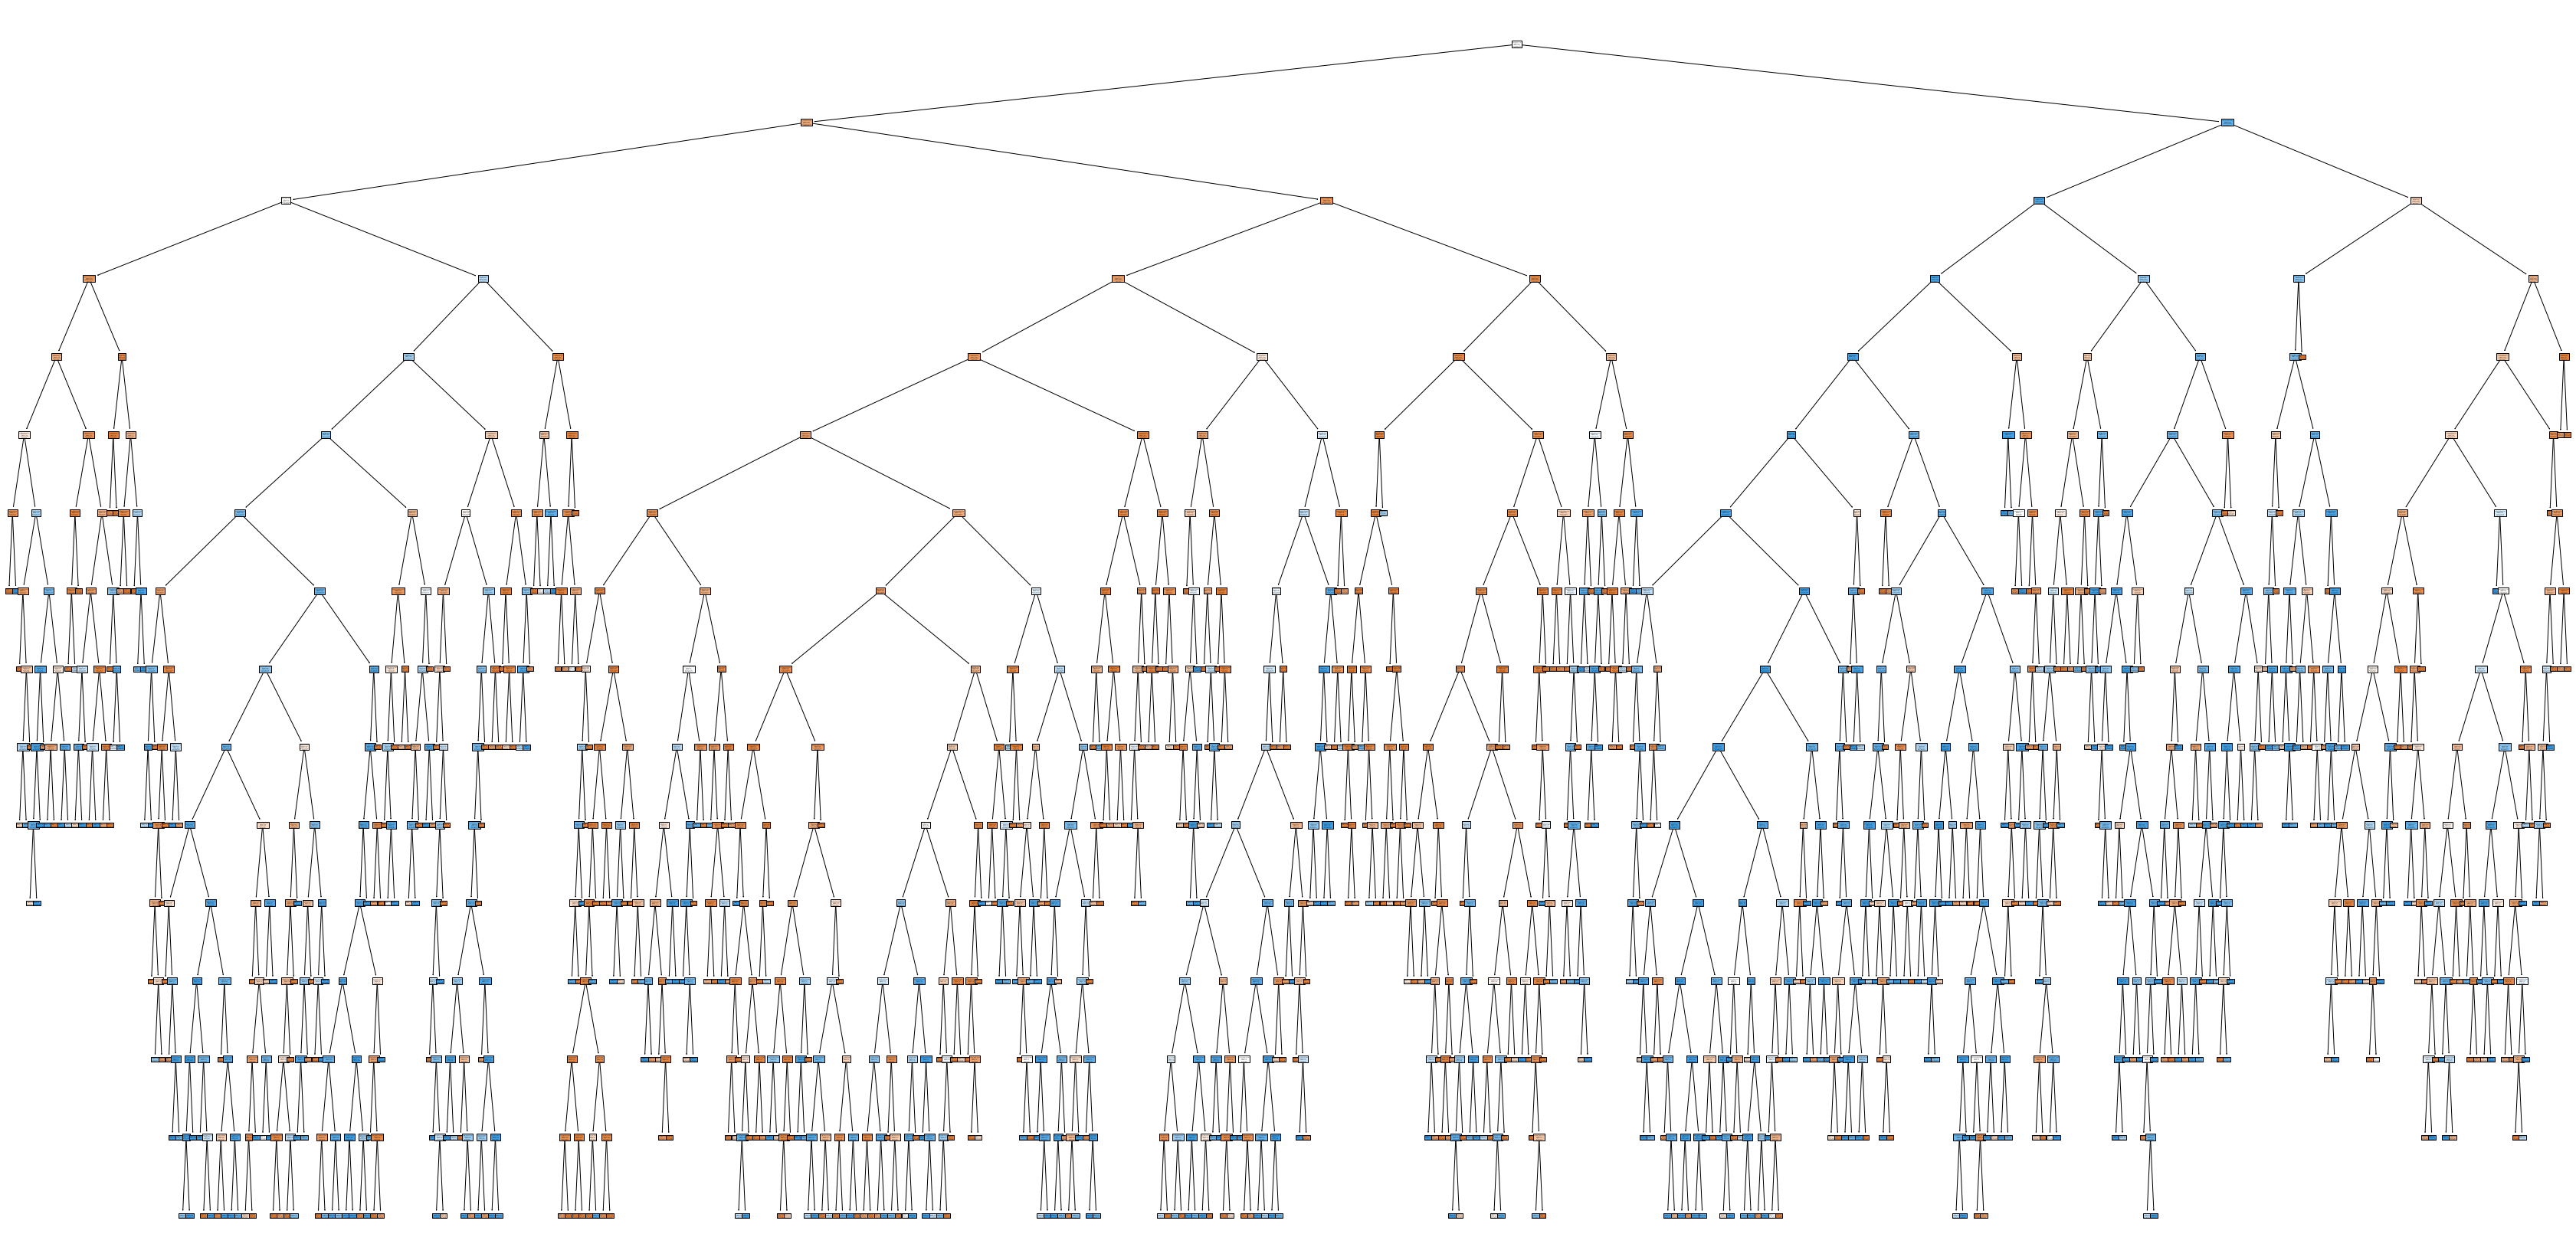

In [78]:
plt.figure(figsize=(60,30))
plot_tree(dt_best, feature_names = col,class_names=['Churn', "Not Churn"],filled=True);

# plotting the tree was an useless idea :) :)